In [9]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [10]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [11]:
# Python SQL toolkit and Object Relational Mapper
import warnings
warnings.filterwarnings('ignore')
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [12]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite", echo=False)
conn = engine.connect()
inspector = inspect(engine)

In [13]:
# reflect an existing database into a new model
# reflect the tables
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [15]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [16]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [17]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

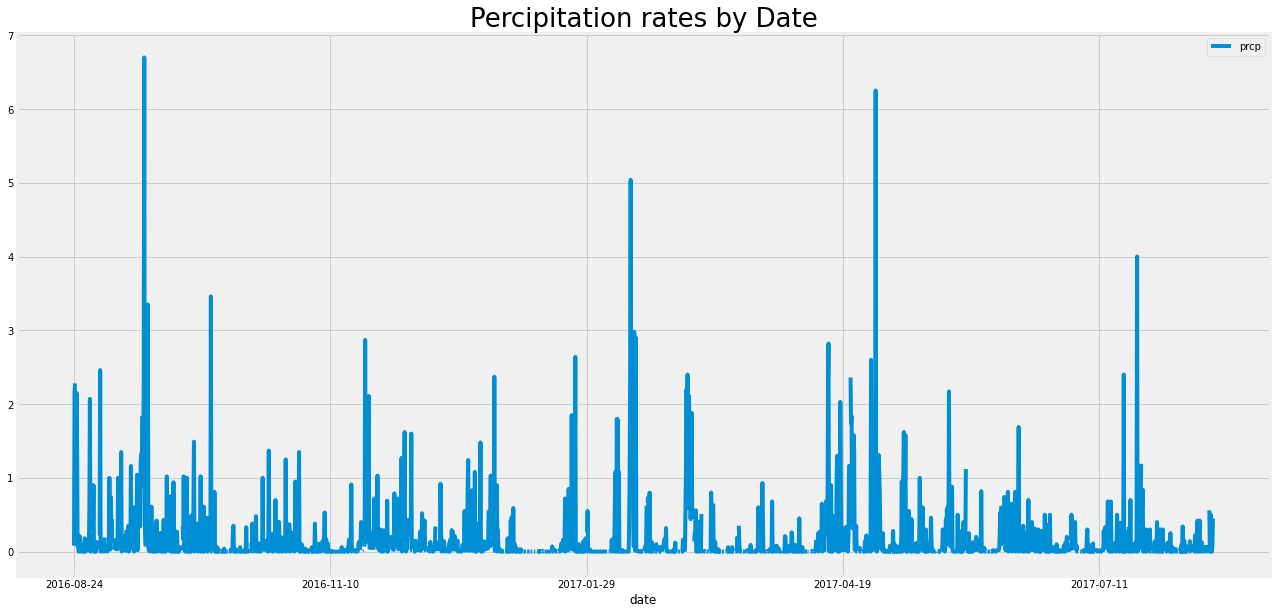

In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
data = session.query(Measurement.prcp, Measurement.date).filter(Measurement.date > '2016-08-23').order_by(Measurement.date)

# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(data)
df = df.set_index('date')
df
# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(20, 10))
plt.title('Percipitation rates by Date', fontsize=26)
plt.show()



In [81]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [82]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.id)).all()

[(9)]

In [83]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(func.count(Measurement.station), Measurement.station).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).all()

[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [26]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
minTemp = session.query(func.min(Measurement.tobs)).filter_by(station='USC00519281').all()
maxTemp = session.query(func.max(Measurement.tobs)).filter_by(station='USC00519281').all()
avgTemp = session.query(func.avg(Measurement.tobs)).filter_by(station='USC00519281').all()
print(f'The max temp is {maxTemp}. The min temp is {minTemp}. The overall average is {avgTemp}')

The max temp is [(85.0,)]. The min temp is [(54.0,)]. The overall average is [(71.66378066378067,)]


<AxesSubplot:ylabel='Frequency'>

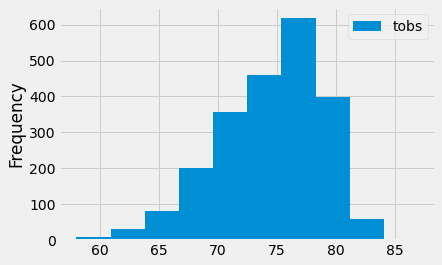

In [85]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tempData = session.query(Measurement.tobs, Measurement.date).\
                filter(Measurement.date > '2016-08-23').\
                order_by(Measurement.date)
tempDF = pd.DataFrame(tempData)
tempDF.plot(kind='hist')

# Close session

In [86]:
# Close Session
session.close()